In [9]:
import pandas as pd
data = pd.read_csv('cleaned_data.csv')

In [8]:
# May need to change if further analysis applied to SAT or ACT scores
# due to modifying column values
sat='Average SAT Highest Composite Score (Applicants Wanting Test Scores Considered)'
act='Average ACT Highest Composite Score (Applicants Wanting Test Scores Considered)'

data[act] = pd.to_numeric(data[act], errors='coerce')
data[act] = data[act].fillna(-1)
data.loc[data[act] != -1, 'Average ACT Highest Composite Score'] = \
    data.loc[data[act] != -1, act] * 40 + 100

data = data[data[act] != -1]
data = data[data[act] != -1]


In [16]:
Average = False # If mean of every semesters gpa wanted, change parameter Average to True
if not Average:
  gpa = 'Average Undergraduate Applicant High School GPA'
else:
  gpa_columns = [f'Semester {i} Cum GPA' for i in range(1, 9)]
  data['Total Cum GPA'] = data[gpa_columns].apply(lambda row: row[row.notna()].mean(), axis=1)
  gpa = 'Total Cum GPA'

<ipython-input-18-27afd1a5d7a0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[sat].fillna(data[act], inplace=True)
<ipython-input-18-27afd1a5d7a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_scores['Score Group'] = 'High SAT/ACT'
<ipython-input-18-27afd1a5d7a0>:13: Set

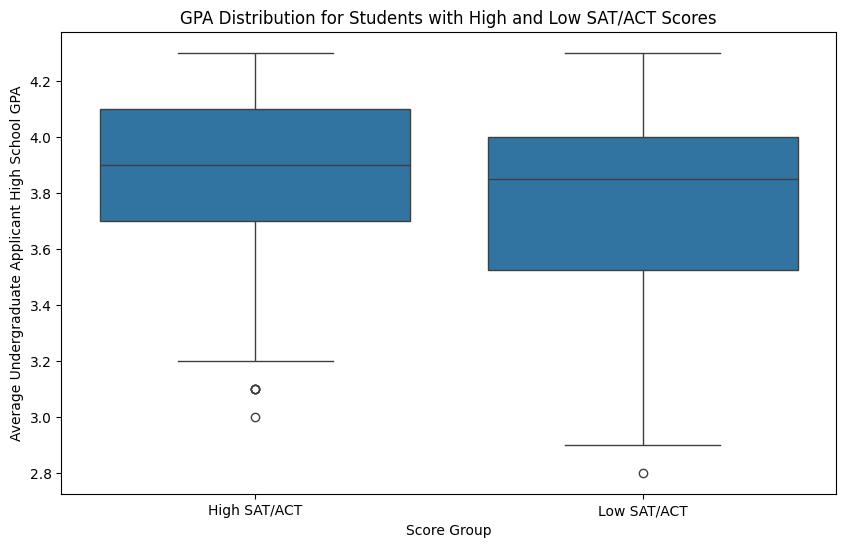

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# May need to change
data[sat].fillna(data[act], inplace=True)
data[sat] = pd.to_numeric(data[sat], errors='coerce')

# Group by median
high_scores = data[data[sat] > data[sat].median()]
low_scores = data[data[sat] <= data[sat].median()]

high_scores['Score Group'] = 'High SAT/ACT'
low_scores['Score Group'] = 'Low SAT/ACT'
combined_scores = pd.concat([high_scores, low_scores])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Score Group', y=gpa, data=combined_scores)
plt.title('GPA Distribution for Students with High and Low SAT/ACT Scores')
plt.show()

# New Section

In [20]:
high_stats = high_scores['Total Cum GPA'].describe()
high_median = round(high_stats['50%'], 2)
high_q1 = round(high_scores['Total Cum GPA'].quantile(0.25), 2)
high_q3 = round(high_scores['Total Cum GPA'].quantile(0.75), 2)
high_mean = round(high_stats['mean'], 2)
high_std = round(high_stats['std'], 2)

print(f"High SAT/ACT Scores Group: ")
print(f"Median: {high_median}")
print(f"1st Quartile (Q1): {high_q1}")
print(f"3rd Quartile (Q3): {high_q3}")
print(f"Mean: {high_mean}")
print(f"Standard Deviation: {high_std}")

High SAT/ACT Scores Group: 
Median: 3.52
1st Quartile (Q1): 3.2
3rd Quartile (Q3): 3.75
Mean: 3.44
Standard Deviation: 0.41


In [21]:
low_stats = low_scores['Total Cum GPA'].describe()
low_median = round(low_stats['50%'], 2)
low_q1 = round(low_scores['Total Cum GPA'].quantile(0.25), 2)
low_q3 = round(low_scores['Total Cum GPA'].quantile(0.75), 2)

print(f"\nLow SAT/ACT Scores Group: ")
print(f"Median: {low_median}")
print(f"1st Quartile (Q1): {low_q1}")
print(f"3rd Quartile (Q3): {low_q3}")
print(f"Mean: {round(low_stats['mean'], 2)}")
print(f"Standard Deviation: {round(low_stats['std'], 2)}")




Low SAT/ACT Scores Group: 
Median: 3.4
1st Quartile (Q1): 3.13
3rd Quartile (Q3): 3.58
Mean: 3.35
Standard Deviation: 0.36
